In [2]:
%matplotlib inline


# Non-negative least squares

In this example, we fit a linear model with positive constraints on the
regression coefficients and compare the estimated coefficients to a classic
linear regression.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Generate some random data



In [4]:
np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples,))

Split the data in train set and test set



In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Fit the Non-Negative least squares.



In [6]:
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.8225220806196525


Fit an OLS.



In [7]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.7436926291700348


Comparing the regression coefficients between OLS and NNLS, we can observe
they are highly correlated (the dashed line is the identity relation),
but the non-negative constraint shrinks some to 0.
The Non-Negative Least squares inherently yield sparse results.



Text(0, 0.5, 'NNLS regression coefficients')

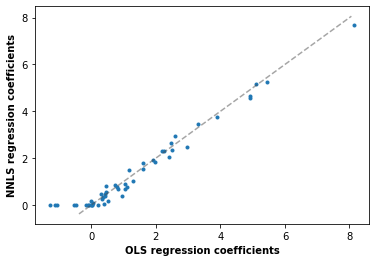

In [8]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")